In [3]:
import numpy as np
import qilisdk
import qutip as qt
import matplotlib.pyplot as plt
import sys

In [4]:
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/retech/retech_2025/src')

import hamiltonian
import dynamics
import plots

In [5]:
def create_random_hamiltonian(Nqubits, min_weight, max_weight):
    H_out = hamiltonian.QutipHamiltonian(Nqubits)
    single_x_weights = np.random.uniform(min_weight, max_weight, size=Nqubits)
    single_z_weights = np.random.uniform(min_weight, max_weight, size=Nqubits)

    interaction_weights = np.random.uniform(min_weight, max_weight, size=int(Nqubits*(Nqubits-1)/2))
    interaction_counter = 0
    for i in range(Nqubits):
        H_out.add_x_field(i, single_x_weights[i])
        H_out.add_z_field(i, single_z_weights[i])

        for j in range(i+1, Nqubits):
            H_out.add_ZZ_term(i, j, interaction_weights[interaction_counter])
            interaction_counter+=1
    
    return H_out

In [7]:
H_test = create_random_hamiltonian(1, -1.0, 1.0)

In [13]:
size = 2

H_fix = hamiltonian.QutipHamiltonian(2)

H_fix.add_z_field(0, 1)
H_fix.add_z_field(1, 1)
H_fix.add_x_field(0, 0.5)
H_fix.add_x_field(1, 0.5)
H_fix.add_ZZ_term(0, 1, 0.25)
print(H_fix.H)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 3.  1.  1.  0.]
 [ 1. -1.  0.  1.]
 [ 1.  0. -1.  1.]
 [ 0.  1.  1. -1.]]


In [14]:
psi_0 = dynamics.initialize_down_state(2)

print(psi_0)

Quantum object: dims=[[2, 2], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]


In [15]:
ti = 0
tf = 10
nsteps = 1000

sim = dynamics.time_evolution(H_fix, psi_0, ti, tf, nsteps)

In [16]:
observables = dynamics.calculate_expectation_values(sim, H_fix)

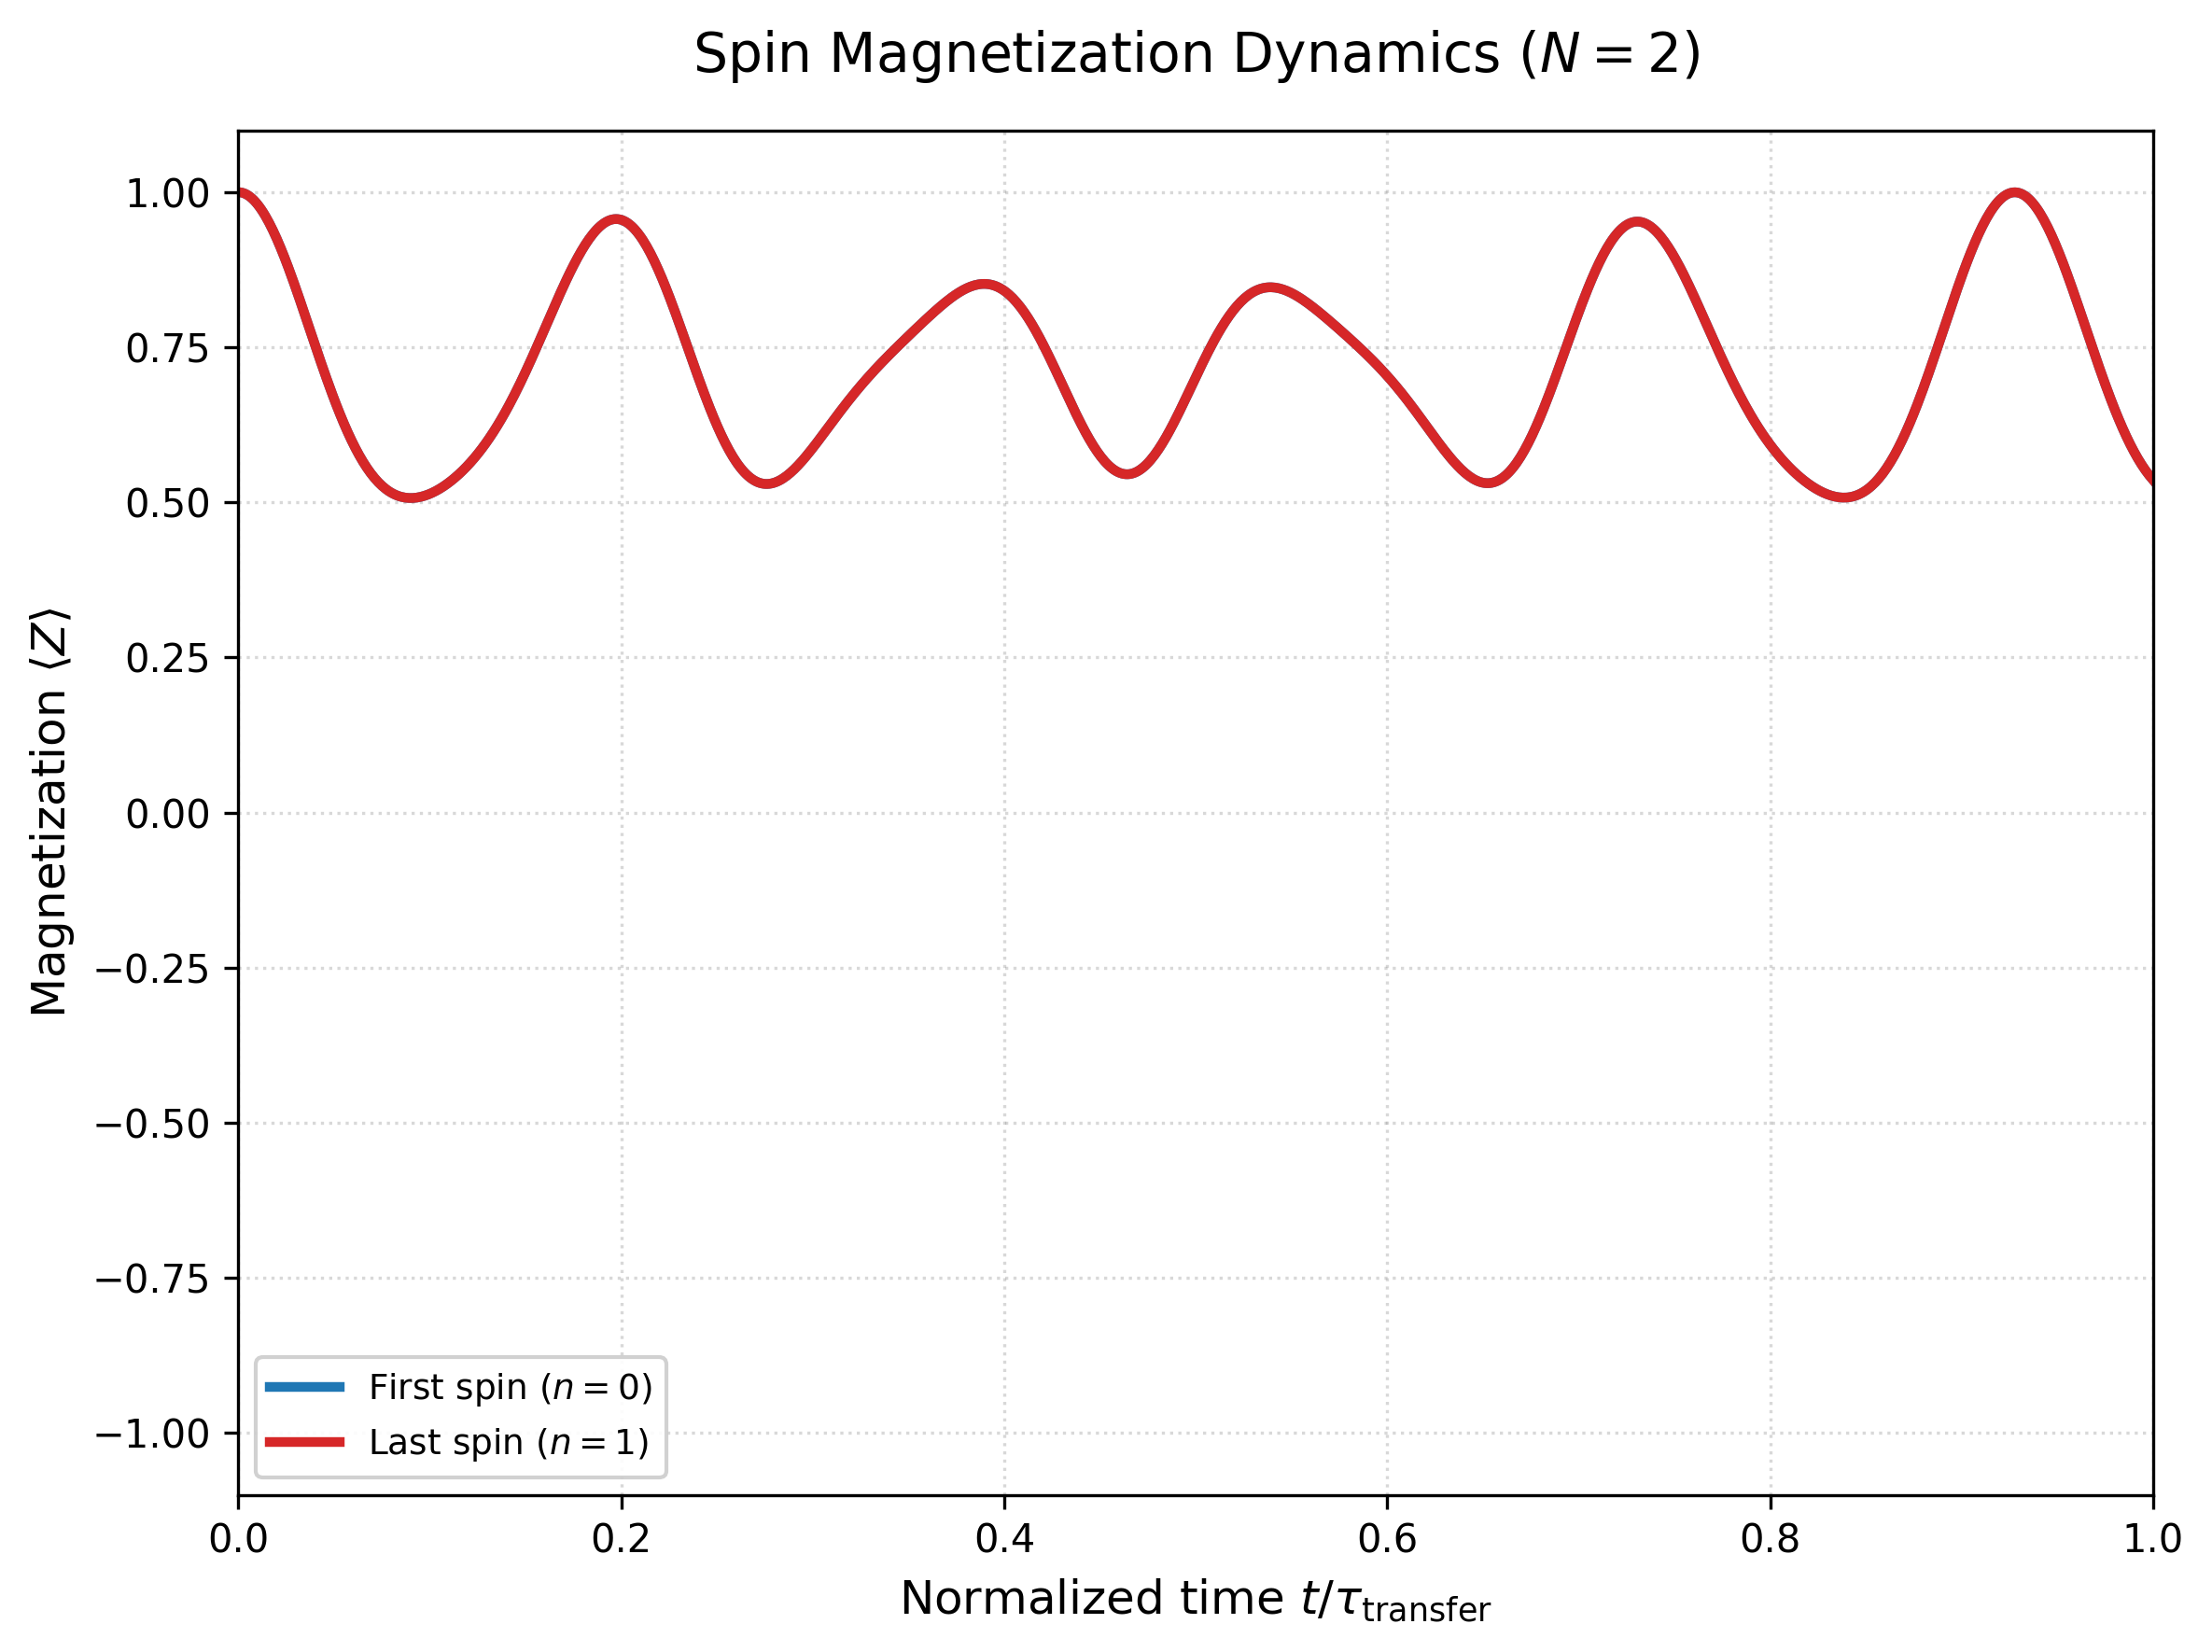

In [21]:
plots.plot_expectations(observables['Sz'], size)